#Time Series Forecast with Keras

#Libraries

In [213]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

#Passengers through time

#Dataset

In [66]:
passageiros = pd.read_csv('Passageiros.csv')

In [67]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

#Data Exploration

In [68]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


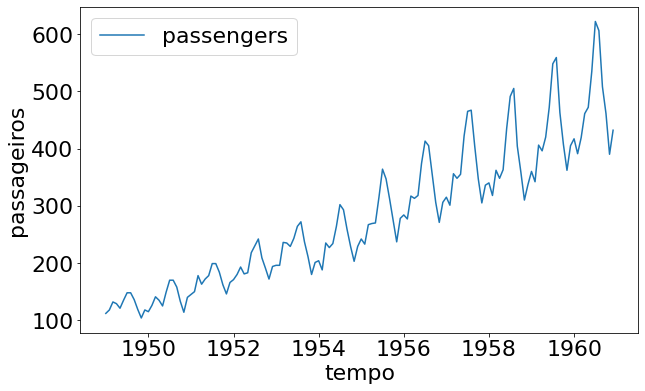

In [69]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='passengers')

#Data Preparation

In [70]:
sc = StandardScaler() #Initializing scaler

In [71]:
sc.fit(passageiros)

StandardScaler()

In [72]:
normalized_data = sc.transform(passageiros) #Normalizing data

In [73]:
x = normalized_data[:,0]
y = normalized_data[:,1]

Text(0.5, 0, 'Date')

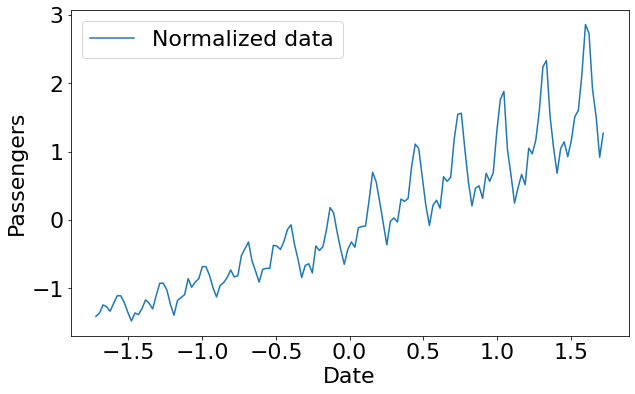

In [74]:
sns.lineplot(x=x, y=y, label='Normalized data')
plt.ylabel('Passengers')
plt.xlabel('Date')

In [75]:
train_size = int(len(passageiros)*0.9)
test_size = len(passageiros) - train_size

In [76]:
xtrain = x[0:train_size]
ytrain = y[0:train_size]

In [77]:
xtest = x[train_size:len(passageiros)]
ytest = y[train_size:len(passageiros)]

Text(0.5, 0, 'Date')

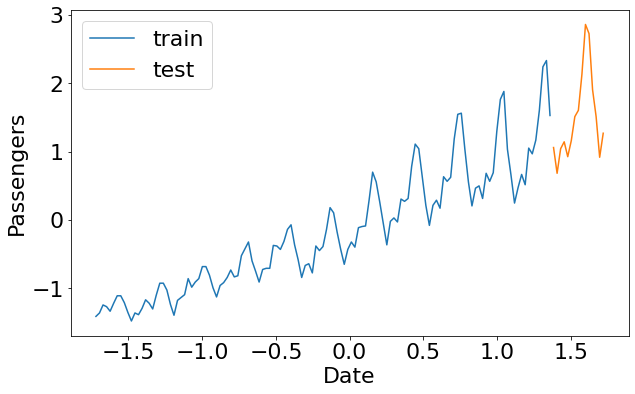

In [78]:
sns.lineplot(x=xtrain, y=ytrain, label='train')
sns.lineplot(x=xtest, y=ytest, label='test')
plt.ylabel('Passengers')
plt.xlabel('Date')

#Model Creation

In [79]:
regressor = Sequential()

In [80]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [81]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [82]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [83]:
regressor.fit(xtrain, ytrain)

5/5 [==============================] - 1s 6ms/step - loss: 0.1288


In [84]:
y_predict = regressor.predict(xtrain)

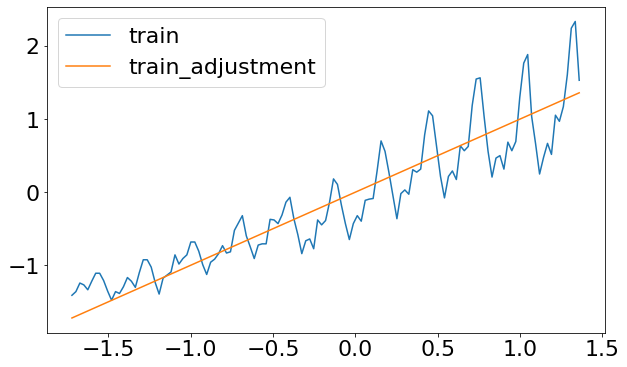

In [85]:
sns.lineplot(x=xtrain, y=ytrain, label='train')
sns.lineplot(x=xtrain, y=y_predict[:,0], label='train_adjustment')

##Linear Prediction

In [86]:
d = {'time':xtrain, 'passengers':y_predict[:,0]}

In [87]:
results = pd.DataFrame(data=d)

In [88]:
results

,time,passengers
0,-1.720064,-1.717448
1,-1.696007,-1.693428
2,-1.671950,-1.669408
3,-1.647894,-1.645387
4,-1.623837,-1.621367
...,...,...
124,1.262984,1.261063
125,1.287041,1.285084
126,1.311098,1.309104
127,1.335155,1.333124


In [89]:
result_transf = sc.inverse_transform(results)

In [90]:
result_transf = pd.DataFrame(result_transf)

In [91]:
result_transf.columns = ['time', 'passengers']

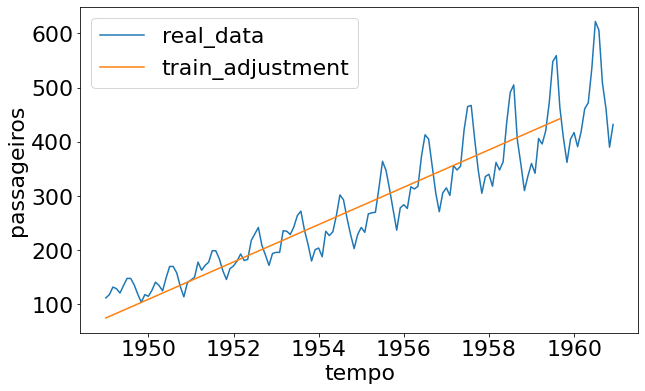

In [92]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='real_data')
sns.lineplot(x='time', y='passengers', data=result_transf, label='train_adjustment')

In [93]:
y_predict_test = regressor.predict(xtest)

In [94]:
d = {'time':xtest, 'passengers':y_predict_test[:,0]}
result_test = pd.DataFrame(data=d)

In [95]:
result_transf_test = sc.inverse_transform(result_test)

In [96]:
result_transf_test = pd.DataFrame(result_transf_test)

In [97]:
result_transf_test.columns = ['time', 'passengers']

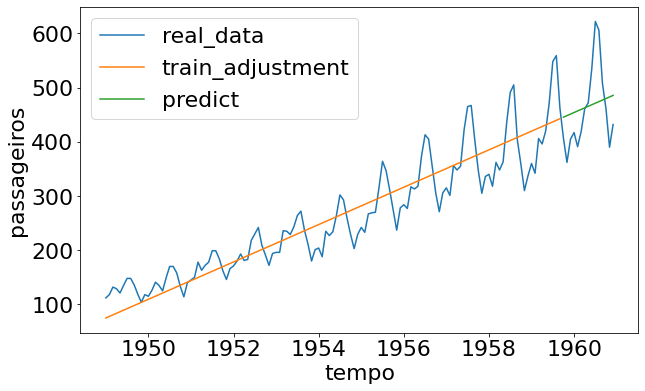

In [98]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='real_data')
sns.lineplot(x='time', y='passengers', data=result_transf, label='train_adjustment')
sns.lineplot(x='time', y='passengers', data=result_transf_test, label='predict')

## Prediction with more layers

In [99]:
regressor2 = Sequential()

In [100]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [101]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [102]:
regressor2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 8)                 64        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [103]:
regressor2.fit(xtrain, ytrain, epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 4ms/step - loss: 0.7896
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7867
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7852
Epoch 4/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7843
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7845
Epoch 6/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7843
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7839
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7834
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7829
Epoch 10/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7819
Epoch 11/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7810
Epoch 12/500
5/5 [==============================] - 0s 12ms/step - loss: 0.7807
Epoch 13/500
5/5 [==============================] - 0s 11ms/

In [104]:
y_predict = regressor2.predict(xtrain)

In [105]:
y_predict_test = regressor2.predict(xtest)

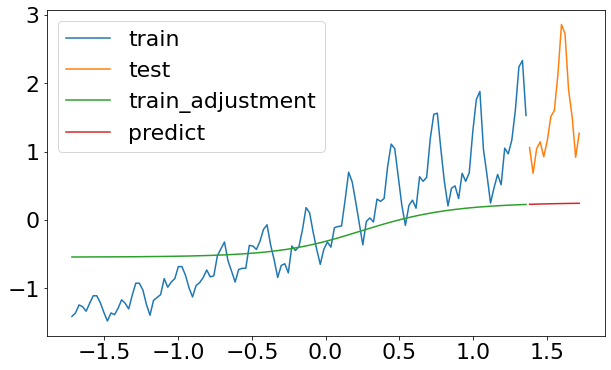

In [106]:
sns.lineplot(x=xtrain, y=ytrain, label='train')
sns.lineplot(x=xtest, y=ytest, label='test')
sns.lineplot(x=xtrain, y=y_predict[:,0], label='train_adjustment')
sns.lineplot(x=xtest, y=y_predict_test[:,0], label='predict')

##Changing data

In [160]:
vector = pd.DataFrame(ytrain)[0]

In [161]:
def split_data(vector, pace):
  X_new, y_new = [], []

  for i in range(pace, vector.shape[0]):
    X_new.append(list(vector.loc[i-pace:i-1]))
    y_new.append(vector.loc[i])
  X_new, y_new = np.array(X_new), np.array(y_new)
  return X_new, y_new

In [162]:
xtrain_new, ytrain_new = split_data(vector, 1)

In [163]:
vector2 = pd.DataFrame(ytest)[0]

In [164]:
xtest_new, ytest_new = split_data(vector2, 1)

In [165]:
regressor3 = Sequential()

In [166]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

In [167]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [168]:
regressor3.fit(xtrain_new, ytrain_new, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7759
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7533
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7347
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7127
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6886
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6671
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6421
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6162
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5852
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5557
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5181
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4819
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [169]:
y_predict_new = regressor3.predict(xtrain_new)

In [170]:
y_predict_test_new = regressor3.predict(xtest_new)

In [171]:
result = pd.DataFrame(y_predict_test_new)[0]

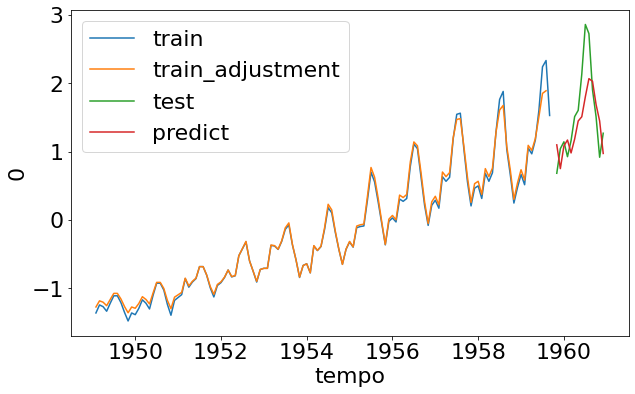

In [172]:
sns.lineplot(x='tempo', y=ytrain_new, data=passageiros[1:129], label='train')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_new)[0], data=passageiros[1:129], label='train_adjustment')
sns.lineplot(x='tempo', y=ytest_new, data=passageiros[130:144], label='test')
sns.lineplot(x='tempo', y=result.values, data=passageiros[130:144], label='predict')

####Increasing the pace

In [173]:
xtrain_new, ytrain_new = split_data(vector, 4)

In [174]:
xtest_new, ytest_new = split_data(vector2, 4)

In [175]:
regressor4 = Sequential()

In [176]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

In [177]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [178]:
regressor4.fit(xtrain_new, ytrain_new, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 5ms/step - loss: 0.8103
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7242
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6492
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5864
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5245
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4585
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4017
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3421
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2892
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2435
Epoch 11/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2071
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1772
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [179]:
y_predict_new = regressor4.predict(xtrain_new)

In [180]:
y_predict_test_new = regressor4.predict(xtest_new)

In [181]:
result = pd.DataFrame(y_predict_test_new)[0]

In [182]:
result_train = pd.DataFrame(y_predict_new)[0]

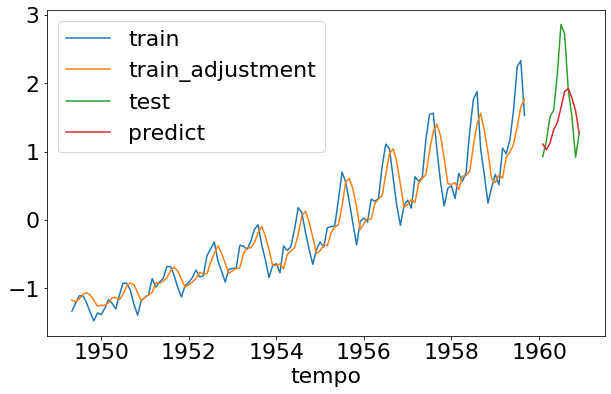

In [183]:
sns.lineplot(x='tempo', y=ytrain_new, data=passageiros[4:129], label='train')
sns.lineplot(x='tempo', y=result_train.values, data=passageiros[4:129], label='train_adjustment')
sns.lineplot(x='tempo', y=ytest_new, data=passageiros[133:144], label='test')
sns.lineplot(x='tempo', y=result.values, data=passageiros[133:144], label='predict')

#Bicicles through time

#Dataset

In [184]:
bike = pd.read_csv('bicicletas.csv')

In [185]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [186]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

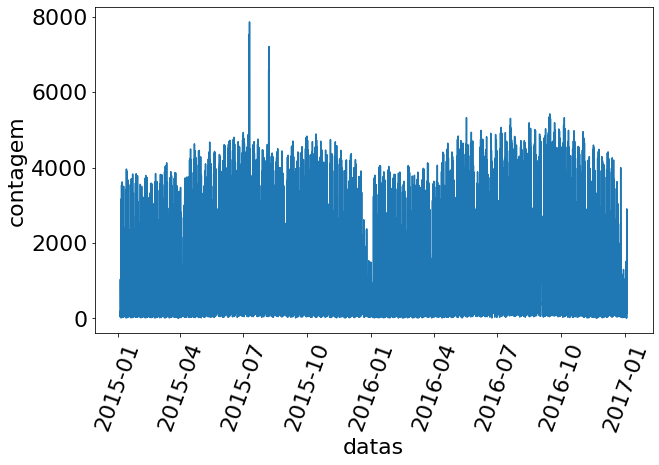

In [187]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

##Creating Model

In [188]:
sc2 = StandardScaler()

In [189]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [190]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [191]:
train_size = int(len(bike)*0.9)
test_size = len(bike) - train_size

In [192]:
ytrain = y[0:train_size]

In [193]:
ytest = y[train_size:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

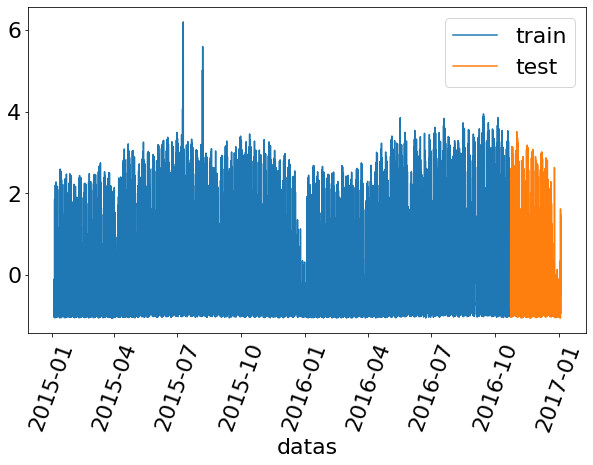

In [195]:
sns.lineplot(x='datas', y=ytrain[:,0], data=bike[0:train_size], label='train')
sns.lineplot(x='datas', y=ytest[:,0], data=bike[train_size:len(bike)], label='test')
plt.xticks(rotation=70)

In [196]:
vector = pd.DataFrame(ytrain)[0]

In [197]:
xtrain_new, ytrain_new = split_data(vector, 10)

In [198]:
vector2 = pd.DataFrame(ytest)[0]

In [199]:
xtest_new, ytest_new = split_data(vector2, 10)

In [201]:
xtrain_new = xtrain_new.reshape((xtrain_new.shape[0], xtrain_new.shape[1],1))

In [202]:
xtest_new = xtest_new.reshape((xtest_new.shape[0], xtest_new.shape[1],1))

In [203]:
recurrent = Sequential()

In [204]:
recurrent.add(LSTM(128, input_shape=(xtrain_new.shape[1], xtrain_new.shape[2])))
recurrent.add(Dense(units=1))

In [205]:
recurrent.compile(loss='mean_squared_error', optimizer='RMSprop')

In [206]:
recurrent.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_32 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [207]:
result = recurrent.fit(xtrain_new, ytrain_new, validation_data=(xtest_new, ytest_new), epochs=100)

Epoch 1/100
490/490 [==============================] - 10s 14ms/step - loss: 0.2652 - val_loss: 0.0815
Epoch 2/100
490/490 [==============================] - 7s 13ms/step - loss: 0.0776 - val_loss: 0.0385
Epoch 3/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0536 - val_loss: 0.0333
Epoch 4/100
490/490 [==============================] - 11s 23ms/step - loss: 0.0465 - val_loss: 0.0659
Epoch 5/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0420 - val_loss: 0.0240
Epoch 6/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0401 - val_loss: 0.0229
Epoch 7/100
490/490 [==============================] - 12s 24ms/step - loss: 0.0378 - val_loss: 0.0227
Epoch 8/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0360 - val_loss: 0.0273
Epoch 9/100
490/490 [==============================] - 11s 23ms/step - loss: 0.0346 - val_loss: 0.0225
Epoch 10/100
490/490 [==============================] - 7s 15ms/step - loss:

In [208]:
y_adjustment = recurrent.predict(xtrain_new)

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238.]), <a list of 8 Text major ticklabel objects>)

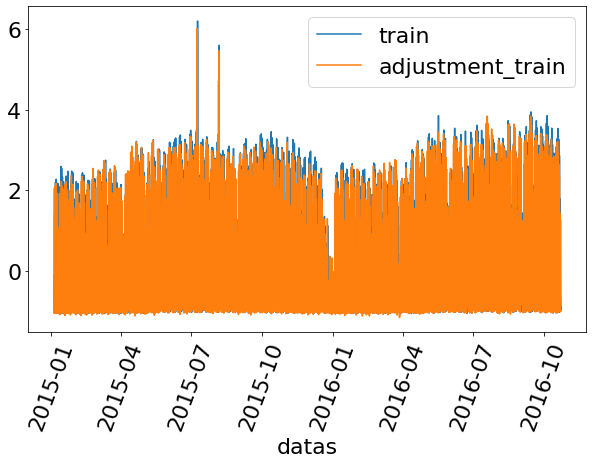

In [209]:
sns.lineplot(x='datas', y=ytrain[:,0], data=bike[0:train_size], label='train')
sns.lineplot(x='datas', y=y_adjustment[:,0], data=bike[0:15662], label='adjustment_train')
plt.xticks(rotation=70)

In [210]:
y_predict = recurrent.predict(xtest_new)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

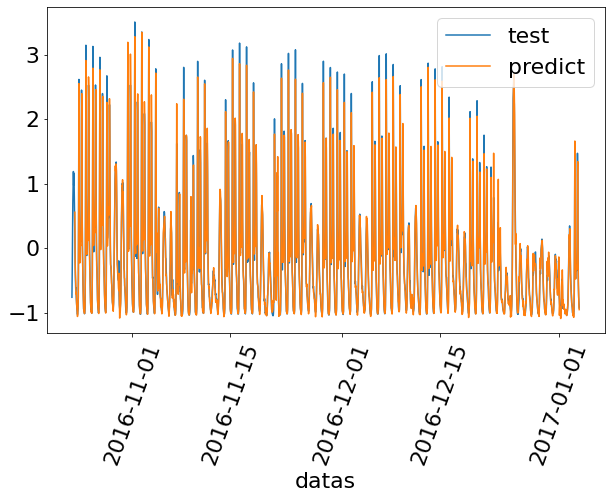

In [212]:
sns.lineplot(x='datas', y=ytest[:,0], data=bike[train_size:len(bike)], label='test')
sns.lineplot(x='datas', y=y_predict[:,0], data=bike[train_size+10:len(bike)], label='predict')
plt.xticks(rotation=70)

In [214]:
recurrent_g = Sequential()

In [215]:
recurrent_g.add(GRU(128, input_shape=(xtrain_new.shape[1], xtrain_new.shape[2])))
recurrent_g.add(Dense(units=1))

In [219]:
recurrent_g.compile(loss='mean_squared_error', optimizer='RMSprop')

In [220]:
recurrent.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_32 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [221]:
result2 = recurrent_g.fit(xtrain_new, ytrain_new, validation_data=(xtest_new, ytest_new), epochs=100)

Epoch 1/100
490/490 [==============================] - 8s 12ms/step - loss: 0.2203 - val_loss: 0.0720
Epoch 2/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0641 - val_loss: 0.0464
Epoch 3/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0488 - val_loss: 0.0353
Epoch 4/100
490/490 [==============================] - 8s 16ms/step - loss: 0.0415 - val_loss: 0.0253
Epoch 5/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0383 - val_loss: 0.0241
Epoch 6/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0360 - val_loss: 0.0254
Epoch 7/100
490/490 [==============================] - 10s 20ms/step - loss: 0.0349 - val_loss: 0.0243
Epoch 8/100
490/490 [==============================] - 10s 19ms/step - loss: 0.0330 - val_loss: 0.0232
Epoch 9/100
490/490 [==============================] - 9s 19ms/step - loss: 0.0318 - val_loss: 0.0208
Epoch 10/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0

In [222]:
y_predict2 = recurrent_g.predict(xtest_new)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

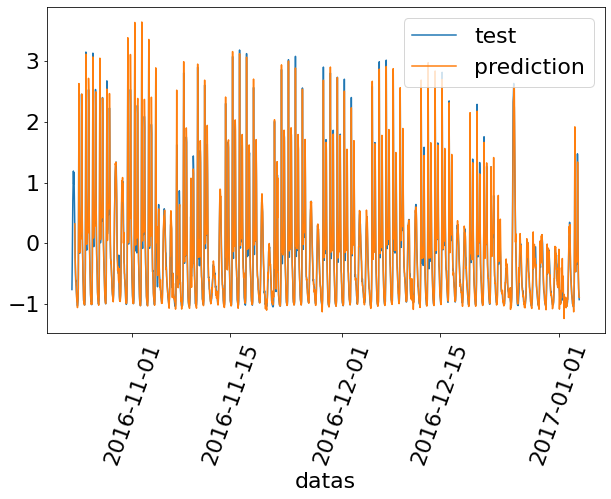

In [223]:
sns.lineplot(x='datas', y=ytest[:,0], data=bike[train_size:len(bike)], label='test')
sns.lineplot(x='datas', y=y_predict2[:,0], data=bike[train_size+10:len(bike)], label='prediction')
plt.xticks(rotation=70)

Text(0, 0.5, 'Loss')

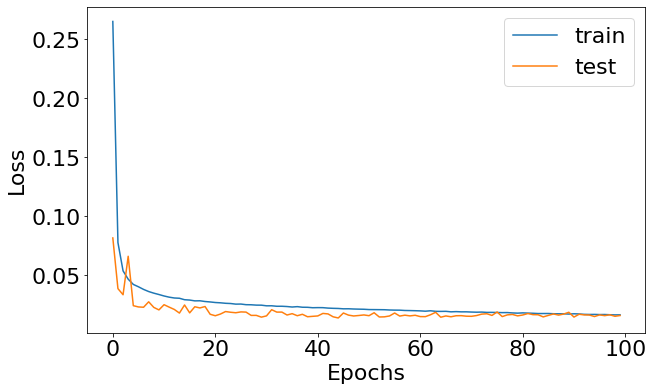

In [226]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

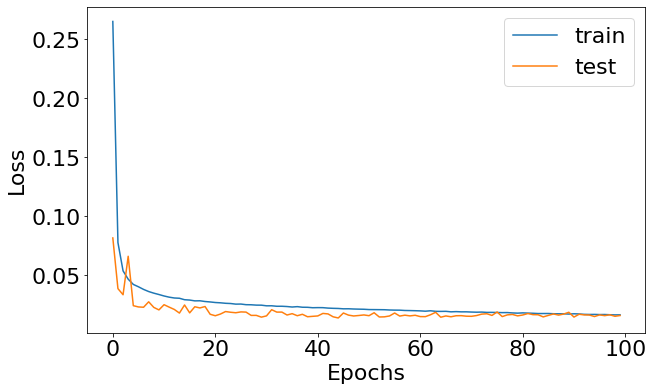

In [225]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')